In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
from numpy import linalg as LA
from sklearn.datasets import load_iris

We use the iris dataset available in sklearn

In [10]:
iris = load_iris()

The dataset is split in the matrix of datapoint and the vector of labels

In [11]:
Xh = iris.data
y = iris.target
X = Xh.T

We apply SVD to the data part

In [13]:
U, s, Vh = LA.svd(X, full_matrices=False)
U.shape, s.shape, Vh.shape

((4, 4), (4,), (4, 150))

The data are projected onto the two principal directions

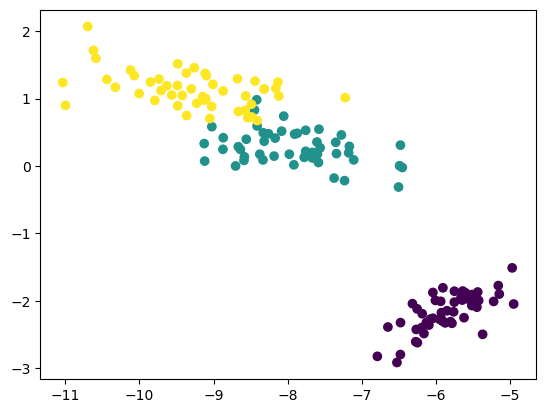

In [14]:
P = U[:,:2]
R = P.T @ X
plt.scatter(R[0,:], R[1,:], c=y)

In [15]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

We define a new data matrix contain

In [16]:
n_neighbors = 1 # here we select the k in k-NN

X = R[:2,:].T

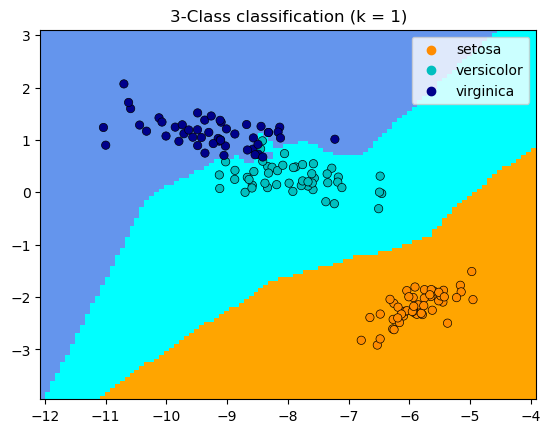

In [17]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform")
clf.fit(X, y)

_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    )

sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

plt.title(
    "3-Class classification (k = %i)" % n_neighbors
    )

plt.show()